<a href="https://colab.research.google.com/github/isdeniz/msc-2024/blob/main/roberta_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers==4.40.2

In [2]:
pip install simpletransformers==0.64.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━

In [3]:
import transformers
>>> transformers.__version__

'4.40.2'

In [4]:
import pandas as pd
from functools import partial
import sklearn
import torch
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import datetime
from sklearn.metrics import confusion_matrix # additional line
import seaborn as sns # additional line
import matplotlib.pyplot as plt # additional line
import torch.multiprocessing # additional line
import os # additional line
os.environ["TOKENIZERS_PARALLELISM"] = "false" # additional line
torch.multiprocessing.set_start_method('spawn', force = True) # additional line
pd.set_option('display.max_colwidth', None)
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)
torch.multiprocessing.set_sharing_strategy('file_system')
cuda_available = torch.cuda.is_available()
print("Is cuda available?", cuda_available)

Is cuda available? True


load and prepare data

In [5]:
train = pd.read_csv('data/train_clean_concat_200.csv')
test = pd.read_csv('data/set_p.csv')
print('Number of issues: ', train.shape, test.shape)

Number of issues:  (696679, 2) (4222, 3)


In [6]:
train.head()

,text,labels
0,time 2021-05-26T20:57:00Z author OWNER repo 0-Yama/Projet-Final-Python title the beginning body we need to add the first file of our project,1
1,time 2020-07-26T20:14:04Z author OWNER repo 0-vortex/dotfiles title better touch tool configuration body export better touch tool configuration as a separate package or submodule,1
2,time 2020-12-04T09:33:18Z author NONE repo 00-Evan/shattered-pixel-dungeon title request text when wand of regrowth starts producing furrowed grass body i was super confused when this happened. a bit of text would have helped me realize what was going on a lot sooner. the wand is getting old and the new grass is not as healthy. ?,1
3,time 2020-09-22T01:49:32Z author OWNER repo 003MattB/ScheduleBuilderImproved title update total credits when cards are removed body total credits is only updated when adding new courses but is never updated when cards are removed,0
4,time 2020-09-22T01:52:14Z author OWNER repo 003MattB/ScheduleBuilderImproved title delete course from matrix body there is no way to remove courses from the matrix once they have been added. don't forget to update the total credits see issue,1


In [7]:
test.head()

,Unnamed: 0,text,labels
0,0,time 2021-04-29T12:35:06Z author OWNER repo Korkman/shell-pack title qssh function key f1 broken in iterm2 when report modifiers using csi u is on body other keys affected as well.,0
1,2,time 2021-04-28T08:52:42Z author OWNER repo shyney7/Test123 title feature request int arrray body deswegen,1
2,4,time 2020-12-18T22:58:52Z author CONTRIBUTOR repo srophe/caesarea title in bibliography module sort menu change author to author editor body could we change author here to author editor please img width 340 alt screen shot 2021 01 04 at 12 52 15 pm src https user images.githubusercontent.com 3083773 103568771 c6f07480 4e8b 11eb 8326 e3bac012b72d.png,1
3,5,time 2021-04-22T08:36:58Z author OWNER repo mr-prud/hugo-cloud title move to docker body use docker to build local stuff,1
4,6,time 2021-05-12T02:38:26Z author OWNER repo JohnBanas/tech_blog title blog post body description user story when i click on an existing blog post i am given the blog title contents post creator's username and date created for that post i am also presented with the option to leave a comment,1


set the classification layer and training parameters

In [8]:
lr = 3e-5
drp = 0
epochs = 4
batch_t = 100
batch_e = 100
max_seq = 200
name = 'roberta'
ver = 'roberta-base'
output_name = 'outputs/' + name

def create_model(name, ver, lr, drp, epochs, batch_t, batch_e, max_seq):
    model_args = ClassificationArgs()
    model_name = name
    model_version = ver
    model_args.learning_rate = lr
    model_args.num_train_epochs = epochs
    model_args.eval_batch_size = batch_t
    model_args.train_batch_size = batch_e
    model_args.max_seq_length = max_seq
    # model_args.n_gpu = 2 below line is added since this line (original) uses 2 GPUs but we have 1
    model_args.n_gpu = 1
    model_args.output_dir = output_name +'/'
    model_args.overwrite_output_dir = True
    model_args.reprocess_input_data = True
    model_args.preprocess_inputs = True
    model_args.save_steps = -1
    model_args.save_model_every_epoch = False

    model = ClassificationModel(model_name, model_version, args = model_args,
                                num_labels = 3,
                                use_cuda=cuda_available)

    return model

define evaluation metrics

In [9]:
def calc(p1, p2, func, **kwargs):
    return func(p1, p2, **kwargs)

metrics_recom = {
    "accuracy": partial(calc,func=sklearn.metrics.accuracy_score) ,
    "p_micro": partial(calc,func=sklearn.metrics.precision_score,average='micro'),
    "p_macro": partial(calc,func=sklearn.metrics.precision_score,average='macro'),
    "p_w": partial(calc,func=sklearn.metrics.precision_score,average='weighted'),
    "r_micro": partial(calc,func=sklearn.metrics.recall_score,average='micro'),
    "r_macro": partial(calc,func=sklearn.metrics.recall_score,average='macro'),
    "r_w": partial(calc,func=sklearn.metrics.recall_score,average='weighted'),
    "f_micro": partial(calc,func=sklearn.metrics.f1_score,average='micro'),
    "f_macro": partial(calc,func=sklearn.metrics.f1_score,average='macro'),
    "f_w": partial(calc,func=sklearn.metrics.f1_score,average='weighted'),
    "classificationReport": partial(calc,func=sklearn.metrics.classification_report, output_dict=True)
}

train the model

In [10]:
model = create_model(name, ver, lr, drp, epochs, batch_t, batch_e, max_seq)
start = datetime.datetime.now()
print('-'*5,  name, ', start time:',
datetime.datetime.strftime(datetime.datetime.today(), '%d/%m/%Y-%H:%M'), '-'*5)
model.train_model(train_df=train, **metrics_recom)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

----- roberta , start time: 29/08/2024-22:59 -----


  0%|          | 0/696679 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:884: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 0 of 4:   0%|          | 0/6967 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 1 of 4:   0%|          | 0/6967 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/6967 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/6967 [00:00<?, ?it/s]

(27868, 0.3240707506516178)

evaluate the model

In [11]:
hours, remainder = divmod((datetime.datetime.now() - start).total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
print('-'*5,  name, ', duration is:', '%dh:%dm:%ds' % (hours, minutes, seconds), '-'*5, '\n\n')
results, model_outputs, wrong_pred = model.eval_model(test, verbose=True, **metrics_recom)
results

----- roberta , duration is: 1h:19m:23s ----- 




  0%|          | 0/4222 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1506: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


{'mcc': 0.9024948269526974,
 'accuracy': 0.9459971577451445,
 'p_micro': 0.9459971577451445,
 'p_macro': 0.8967007068584708,
 'p_w': 0.9477355419799242,
 'r_micro': 0.9459971577451445,
 'r_macro': 0.9270299846317975,
 'r_w': 0.9459971577451445,
 'f_micro': 0.9459971577451445,
 'f_macro': 0.9105274915266212,
 'f_w': 0.9465459217693885,
 'classificationReport': {'0.0': {'precision': 0.9515096065873742,
   'recall': 0.958967266021208,
   'f1-score': 0.9552238805970149,
   'support': 2169.0},
  '1.0': {'precision': 0.9674657534246576,
   'recall': 0.9390581717451524,
   'f1-score': 0.9530503233061569,
   'support': 1805.0},
  '2.0': {'precision': 0.7711267605633803,
   'recall': 0.8830645161290323,
   'f1-score': 0.8233082706766918,
   'support': 248.0},
  'accuracy': 0.9459971577451445,
  'macro avg': {'precision': 0.8967007068584708,
   'recall': 0.9270299846317975,
   'f1-score': 0.9105274915266212,
   'support': 4222.0},
  'weighted avg': {'precision': 0.9477355419799242,
   'recall': 

get the confusion matrix

In [12]:
model_outputs_df = pd.DataFrame(model_outputs, columns = ['bug', 'enhancement', 'question'])

In [13]:
def get_prediction(row):
  max_value = row.max()
  if max_value == row['bug']:
    return 0
  elif max_value == row['enhancement']:
    return 1
  elif max_value == row['question']:
    return 2

In [14]:
model_outputs_df['prediction'] = model_outputs_df.apply(get_prediction, axis = 1)

In [15]:
model_outputs_df['actual'] = test['labels']

In [16]:
label_names = ['bug', 'enhancement', 'question']

In [17]:
predicted_labels = model_outputs_df['prediction']
actual_labels = model_outputs_df['actual']

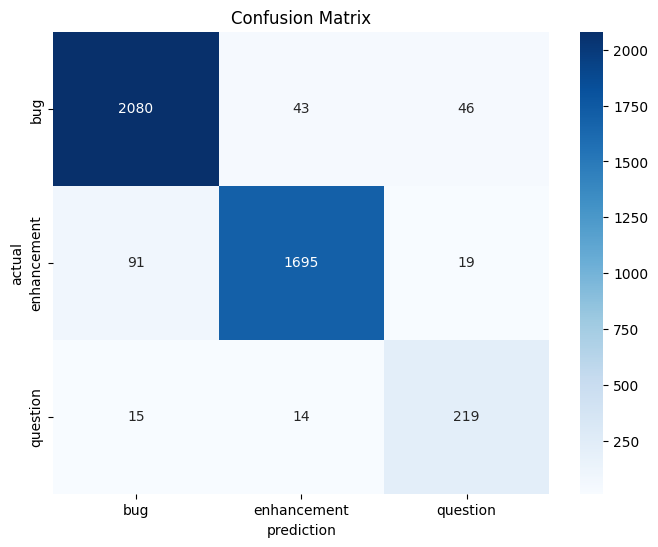

In [18]:
confusion_matrix = confusion_matrix(actual_labels, predicted_labels)
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = label_names,
            yticklabels = label_names)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

save predictions

In [19]:
predictions = pd.DataFrame(columns = ['text', 'labels', 'actual_labels', 'prediction'])

In [20]:
predictions['text'] = test['text']
predictions['labels'] = test['labels']
predictions['actual_labels'] = model_outputs_df['actual']
predictions['prediction'] = model_outputs_df['prediction']
predictions.head()

,text,labels,actual_labels,prediction
0,time 2021-04-29T12:35:06Z author OWNER repo Korkman/shell-pack title qssh function key f1 broken in iterm2 when report modifiers using csi u is on body other keys affected as well.,0,0,0
1,time 2021-04-28T08:52:42Z author OWNER repo shyney7/Test123 title feature request int arrray body deswegen,1,1,1
2,time 2020-12-18T22:58:52Z author CONTRIBUTOR repo srophe/caesarea title in bibliography module sort menu change author to author editor body could we change author here to author editor please img width 340 alt screen shot 2021 01 04 at 12 52 15 pm src https user images.githubusercontent.com 3083773 103568771 c6f07480 4e8b 11eb 8326 e3bac012b72d.png,1,1,1
3,time 2021-04-22T08:36:58Z author OWNER repo mr-prud/hugo-cloud title move to docker body use docker to build local stuff,1,1,1
4,time 2021-05-12T02:38:26Z author OWNER repo JohnBanas/tech_blog title blog post body description user story when i click on an existing blog post i am given the blog title contents post creator's username and date created for that post i am also presented with the option to leave a comment,1,1,1


In [21]:
predictions.to_csv('data/nlbse22_set_p_roberta_preds.csv')

In [22]:
predictions.to_pickle('data/nlbse22_set_p_roberta_preds.pkl')